# Optimization Lab 6
Alfons Cordoba / Mateusz Dorobek / Emilio Tylson Baixauli 

# Data generation

In [238]:
from sklearn.datasets.samples_generator import make_blobs

def load_data(n_samples = 1000, n_features = 10, class_no = 2, cluster_std = 0.5):
    X, y = make_blobs(n_samples=n_samples, centers=class_no, n_features=n_features, cluster_std=cluster_std, random_state=0 )
    y[y == 0] = -1
    return X, y

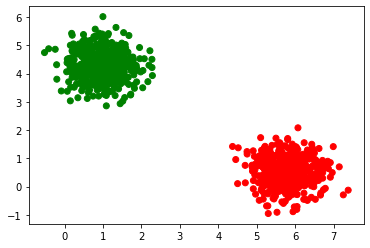

In [239]:
import matplotlib.pyplot as plt
def plot_data(X, y):
    colors = ['r' if i == 1 else 'g' for i in y]
    plt.scatter(X[:, 0], X[:, 1], color=colors)
    plt.show()

X, y = load_data()
plot_data(X, y)

# Experiments

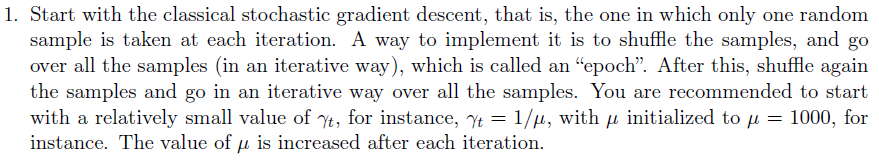

In [240]:
import numpy as np

def fun(w, b, X, y, lamb):
    return (lamb/2)*(w.T@w) + np.sum(np.maximum(np.zeros(y.shape), y*(X@w+b)))

In [424]:
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

def stochastic_gradient(n_batch = 1, n_epochs=100, plot=False):
    n = 10
    n_samples = 1000
    mi = 1000
    gamma = 1/mi
    lamb = 0.01

    X, y = load_data(n_samples=n_samples, n_features=n)

    w_t = w = np.zeros((n))
    b_t = b = 0
    history = []
    
    
    batch_size = y.shape[0]/n_batch
    assert batch_size%1==0
    batch_size = int(batch_size)
    
    for t in range(n_epochs):
        X_s, y_s = shuffle(X, y, random_state=0)
        mi *= 1.1
        gamma_t = 1/mi
        
        for batch_idx in range(n_batch):
            X_b = X_s[batch_idx*batch_size:(batch_idx+1)*batch_size,:]
            y_b = y_s[batch_idx*batch_size:(batch_idx+1)*batch_size]
            for X_t, y_t in zip(X_b, y_b):

                if y_t*(X_t@w+b) > 1:
                    w_t -= gamma_t*w
                else:
                    w_t -= gamma_t*w - y_t*X_t
                    b_t -= gamma_t*(-y_t)
            w = w_t
            b = b_t
        history.append(np.log(fun(w, b, X, y, lamb)))
    print("Achieved result: %.2f" % history[-1])
    if plot:
        plt.plot(history)
        if n_batch == 1:
            plt.title("Classical Stochastic Gradient")
        else:
            plt.title("Minibatch Stochastic Gradient")
        plt.ylabel("f(x)")
        plt.xlabel("Iterations")
        plt.show()

In [425]:
stochastic_gradient(n_epochs=100)

Achieved result: 10.22


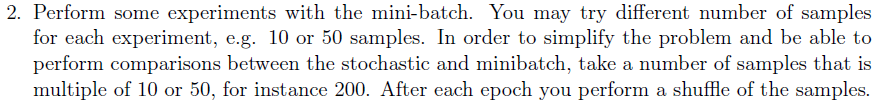

In [423]:
stochastic_gradient(n_batch=20, n_epochs=100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
Achieved result: 11.41


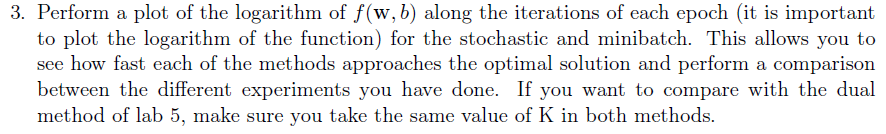

Achieved result: 15.47


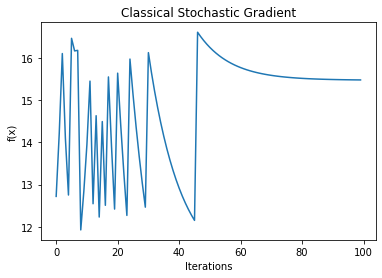

Achieved result: 15.47


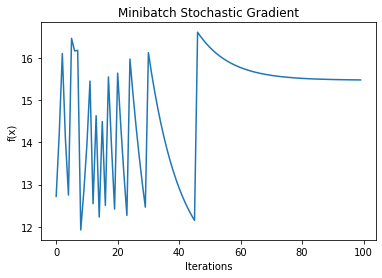

In [420]:
stochastic_gradient(n_epochs=100, plot=True)
stochastic_gradient(n_batch=20, n_epochs=100, plot=True)